In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('../../data/processed/la_liga_data.csv')

In [3]:
prematch_cols = ['Time',
 'Comp',
 'Round',
 'Day',
 'Venue',
 'xG',
 'xGA',
 'Opponent',
 'Captain',
 'Formation',
 'Opp Formation',
 'Referee',
 'Season',
 'Team']
shooting_cols = ['Standard__Gls',
 'Standard__Sh',
 'Standard__SoT',
 'Standard__SoT%',
 'Standard__G/Sh',
 'Standard__G/SoT',
 'Standard__Dist',
 'Standard__FK',
 'Standard__PK',
 'Standard__PKatt']
goal_keeping_cols = ['Performance__SoTA',
 'Performance__GA',
 'Performance__Saves',
 'Performance__Save%',
 'Performance__CS',
 'Performance__PSxG',
 'Performance__PSxG+/-',
 'Penalty Kicks__PKatt',
 'Penalty Kicks__PKA',
 'Penalty Kicks__PKsv',
 'Penalty Kicks__PKm',
 'Launched__Cmp',
 'Launched__Att',
 'Launched__Cmp%',
 'Passes__Att (GK)',
 'Passes__Thr',
 'Passes__Launch%',
 'Passes__AvgLen',
 'Goal Kicks__Att',
 'Goal Kicks__Launch%',
 'Goal Kicks__AvgLen',
 'Crosses__Opp',
 'Crosses__Stp',
 'Crosses__Stp%',
 'Sweeper__#OPA']
passing_cols = [
 'Total__Cmp',
 'Total__Att',
 'Total__Cmp%',
 'Total__TotDist',
 'Total__PrgDist',
 'Short__Cmp',
 'Short__Att',
 'Short__Cmp%',
 'Medium__Cmp',
 'Medium__Att',
 'Medium__Cmp%',
 'Long__Cmp',
 'Long__Att',
 'Long__Cmp%',
 'Ast',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'PrgP']
pass_type_cols = ['Att',
 'Pass Types__Live',
 'Pass Types__Dead',
 'Pass Types__FK',
 'Pass Types__TB',
 'Pass Types__Sw',
 'Pass Types__Crs',
 'Pass Types__TI',
 'Pass Types__CK',
 'Corner Kicks__In',
 'Corner Kicks__Out',
 'Corner Kicks__Str',
 'Outcomes__Cmp',
 'Outcomes__Off',
 'Outcomes__Blocks']
goal_shot_creation_cols = ['SCA Types__SCA',
 'SCA Types__PassLive',
 'SCA Types__PassDead',
 'SCA Types__TO',
 'SCA Types__Sh',
 'SCA Types__Fld',
 'SCA Types__Def',
 'GCA Types__GCA',
 'GCA Types__PassLive',
 'GCA Types__PassDead',
 'GCA Types__TO',
 'GCA Types__Sh',
 'GCA Types__Fld',
 'GCA Types__Def']
defensive_actions_cols = ['Tackles__Tkl',
 'Tackles__TklW',
 'Tackles__Def 3rd',
 'Tackles__Mid 3rd',
 'Tackles__Att 3rd',
 'Challenges__Tkl',
 'Challenges__Att',
 'Challenges__Tkl%',
 'Challenges__Lost',
 'Blocks__Blocks',
 'Blocks__Sh',
 'Blocks__Pass',
 'Int',
 'Tkl+Int',
 'Clr',
 'Err']
possession_cols = ['Poss',
 'Touches__Touches',
 'Touches__Def Pen',
 'Touches__Def 3rd',
 'Touches__Mid 3rd',
 'Touches__Att 3rd',
 'Touches__Att Pen',
 'Touches__Live',
 'Take-Ons__Att',
 'Take-Ons__Succ',
 'Take-Ons__Succ%',
 'Take-Ons__Tkld',
 'Take-Ons__Tkld%',
 'Carries__Carries',
 'Carries__TotDist',
 'Carries__PrgDist',
 'Carries__PrgC',
 'Carries__1/3',
 'Carries__CPA',
 'Carries__Mis',
 'Carries__Dis',
 'Receiving__Rec',
 'Receiving__PrgR']
miscellaneous_cols = ['Performance__CrdY',
 'Performance__CrdR',
 'Performance__2CrdY',
 'Performance__Fls',
 'Performance__Fld',
 'Performance__Off',
 'Performance__Crs',
 'Performance__Int',
 'Performance__TklW',
 'Performance__PKwon',
 'Performance__PKcon',
 'Performance__OG',
 'Performance__Recov',
 'Aerial Duels__Won',
 'Aerial Duels__Lost',
 'Aerial Duels__Won%']

In [4]:
my_col = [prematch_cols, passing_cols, pass_type_cols, possession_cols, miscellaneous_cols]

In [5]:
df_prematch = df[prematch_cols]
df_passing = df[passing_cols]
df_pass_type = df[pass_type_cols]
df_possess = df[possession_cols]
df_miscell = df[miscellaneous_cols]

In [6]:
match_result = df[['Time', 'Team', 'Opponent', 'GF', 'GA']]
match_result['Win'] = match_result.apply(
    lambda row: 1 if row['GF'] > row['GA'] else (0 if row['GF'] == row['GA'] else -1),
    axis=1)
print(match_result.shape)
match_result.head(1)

(5520, 6)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14964\3534555709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_result['Win'] = match_result.apply(


,Time,Team,Opponent,GF,GA,Win
0,2017-08-18 20:15:00,Alaves,Leganes,0.0,1.0,-1


# 1, EDA in each single group


## a, Prematch

In [7]:
df_prematch.columns

Index(['Time', 'Comp', 'Round', 'Day', 'Venue', 'xG', 'xGA', 'Opponent',
       'Captain', 'Formation', 'Opp Formation', 'Referee', 'Season', 'Team'],
      dtype='object')

In [8]:
# prompt: I want to concat the df_prematch with match_result except for the duplicate ones

prematch_to_result = pd.merge(df_prematch, match_result, on=['Time', 'Team', 'Opponent'], how='left')

prematch_to_result.head(1)

,Time,Comp,Round,Day,Venue,xG,xGA,Opponent,Captain,Formation,Opp Formation,Referee,Season,Team,GF,GA,Win
0,2017-08-18 20:15:00,La Liga,1,5,0,1.1,1.3,Leganes,Manu García,4-4-2,4-2-3-1,José Munuera,2017,Alaves,0.0,1.0,-1


### Correlation


In [9]:
numeric_cols = df_prematch.select_dtypes(include=np.number).columns
temp_df = prematch_to_result[numeric_cols.tolist() + ['GF', 'GA', 'Win']]
correlation_prematch_GF = temp_df[numeric_cols.tolist() + ['GF']].corr()
correlation_prematch_GA = temp_df[numeric_cols.tolist() + ['GA']].corr()
correlation_prematch_Win = temp_df[numeric_cols.tolist() + ['Win']].corr()

### Prematch to GF

In [10]:
correlation_prematch_GF_cleaned = correlation_prematch_GF[:-1]
correlation_prematch_GF_cleaned = correlation_prematch_GF_cleaned.drop(index = correlation_prematch_GF_cleaned.index[1])
correlation_prematch_GF_cleaned.head(1)

,Round,Day,Venue,xG,xGA,Season,GF
Round,1.0,0.011822,8.111700e-17,0.012231,0.012231,-0.083913,0.006987


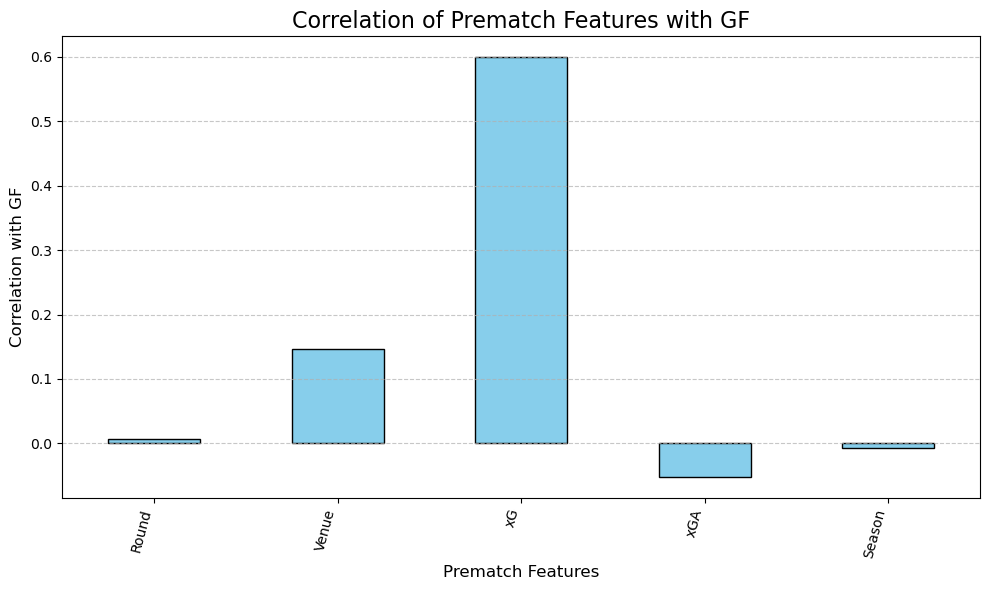

In [11]:
import matplotlib.pyplot as plt

# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_prematch_GF_cleaned['GF']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Prematch Features with GF', fontsize=16)
plt.xlabel('Prematch Features', fontsize=12)
plt.ylabel('Correlation with GF', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [12]:
good_prematch_features_GF = correlation_prematch_GF_cleaned[(correlation_prematch_GF_cleaned['GF'] >= 0.2) | (correlation_prematch_GF_cleaned['GF'] <= -0.2)]
good_prematch_features_GF = good_prematch_features_GF['GF']
good_prematch_features_GF

xG    0.59951
Name: GF, dtype: float64

### Prematch to GA

In [13]:
correlation_prematch_GA_cleaned = correlation_prematch_GA[:-1]
correlation_prematch_GA_cleaned = correlation_prematch_GA_cleaned.drop(index = correlation_prematch_GA_cleaned.index[1])


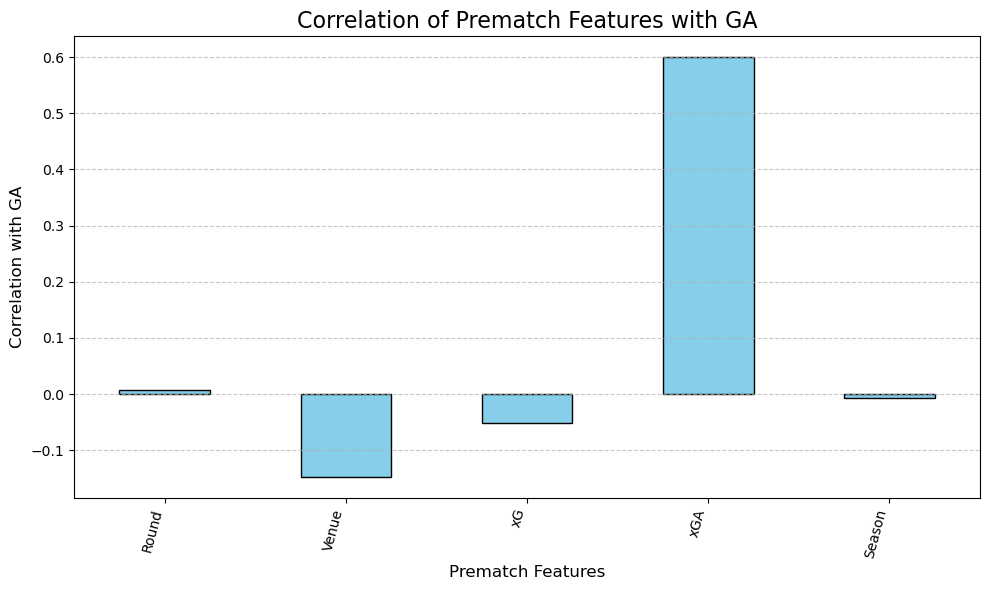

In [14]:
import matplotlib.pyplot as plt

# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_prematch_GA_cleaned['GA']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Prematch Features with GA', fontsize=16)
plt.xlabel('Prematch Features', fontsize=12)
plt.ylabel('Correlation with GA', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [15]:
good_prematch_features_GA = correlation_prematch_GA_cleaned[(correlation_prematch_GA_cleaned['GA'] >= 0.2) | (correlation_prematch_GA_cleaned['GA'] <= -0.2)]
good_prematch_features_GA = good_prematch_features_GA['GA']
good_prematch_features_GA

xGA    0.59951
Name: GA, dtype: float64

### Prematch to win

In [16]:
correlation_prematch_GF_cleaned_win = correlation_prematch_Win[:-1]
correlation_prematch_GF_cleaned_win = correlation_prematch_GF_cleaned_win.drop(index = correlation_prematch_GF_cleaned_win.index[1])


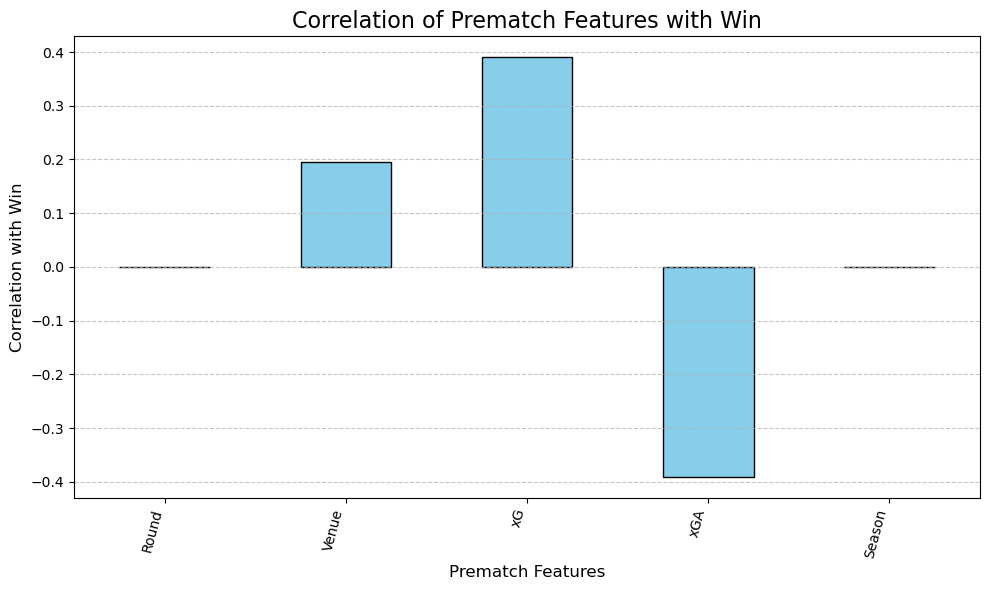

In [17]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_prematch_GF_cleaned_win['Win']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Prematch Features with Win', fontsize=16)
plt.xlabel('Prematch Features', fontsize=12)
plt.ylabel('Correlation with Win', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [18]:
good_prematch_features_win = correlation_prematch_GF_cleaned_win[(correlation_prematch_Win['Win'] >= 0.2) | (correlation_prematch_Win['Win'] <= -0.2)]
good_prematch_features_win = good_prematch_features_win['Win']
good_prematch_features_win


C:\Users\Admin\AppData\Local\Temp\ipykernel_14964\866189007.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_prematch_features_win = correlation_prematch_GF_cleaned_win[(correlation_prematch_Win['Win'] >= 0.2) | (correlation_prematch_Win['Win'] <= -0.2)]


xG     0.390208
xGA   -0.390208
Name: Win, dtype: float64

## b, Passing

### Create df

In [19]:
pass_to_result = pd.concat([match_result, df_passing], axis=1)



# Hiển thị kết quả
pass_to_result.head(1)

,Time,Team,Opponent,GF,GA,Win,Total__Cmp,Total__Att,Total__Cmp%,Total__TotDist,...,Medium__Cmp%,Long__Cmp,Long__Att,Long__Cmp%,Ast,KP,1/3,PPA,CrsPA,PrgP
0,2017-08-18 20:15:00,Alaves,Leganes,0.0,1.0,-1,252.0,385.0,65.5,4587.0,...,71.0,33.0,82.0,40.2,0,7.0,19.0,2.0,0.0,18.0


### Correlation

In [20]:
temp_df = pass_to_result[passing_cols + ['GF', 'Win', 'GA']]

# Calculate the correlation between the selected columns and 'GF'
correlation_passing_GF = temp_df[passing_cols + ['GF']].corr()

correlation_passing_GA = temp_df[passing_cols + ['GA']].corr()

# Calculate the correlation between the selected columns and 'Win'
correlation_passing_Win = temp_df[passing_cols + ['Win']].corr()



### Pass to GF

In [21]:
correlation_passing_GF_cleaned = correlation_passing_GF[:-1]
correlation_passing_GF_cleaned = correlation_passing_GF_cleaned.drop(index = correlation_passing_GF_cleaned.index[1])

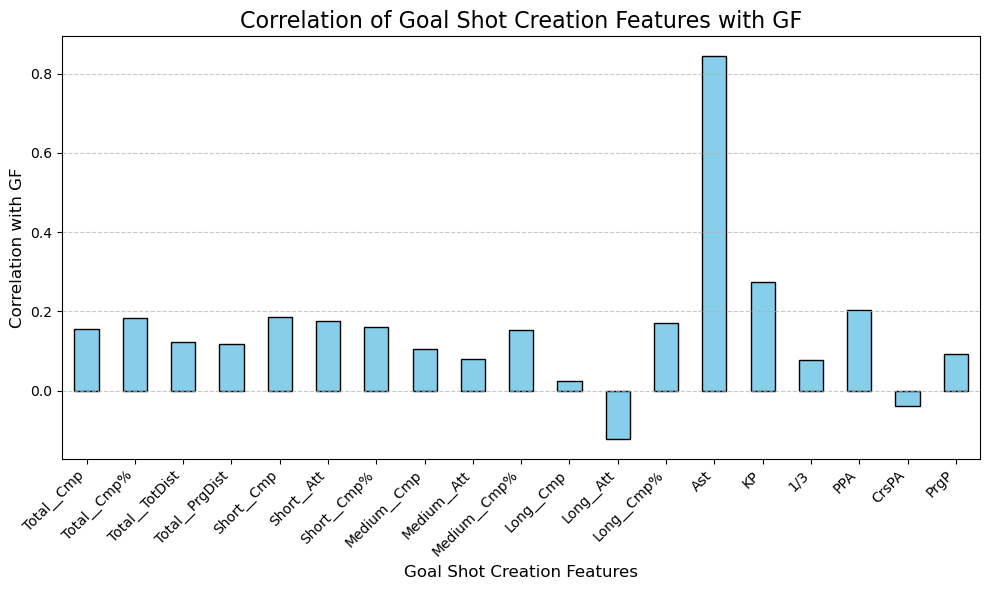

In [22]:
import matplotlib.pyplot as plt

# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_passing_GF_cleaned['GF']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Goal Shot Creation Features with GF', fontsize=16)
plt.xlabel('Goal Shot Creation Features', fontsize=12)
plt.ylabel('Correlation with GF', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [23]:
good_passing_features_GF = correlation_passing_GF_cleaned[(correlation_passing_GF_cleaned['GF'] >= 0.2) | (correlation_passing_GF_cleaned['GF'] <= -0.2)]
good_passing_features_GF = good_passing_features_GF['GF']
good_passing_features_GF

Ast    0.845885
KP     0.274488
PPA    0.203963
Name: GF, dtype: float64

### Pass to GA

In [24]:
correlation_passing_GA_cleaned = correlation_passing_GA[:-1]
correlation_passing_GA_cleaned = correlation_passing_GA_cleaned.drop(index = correlation_passing_GA_cleaned.index[1])

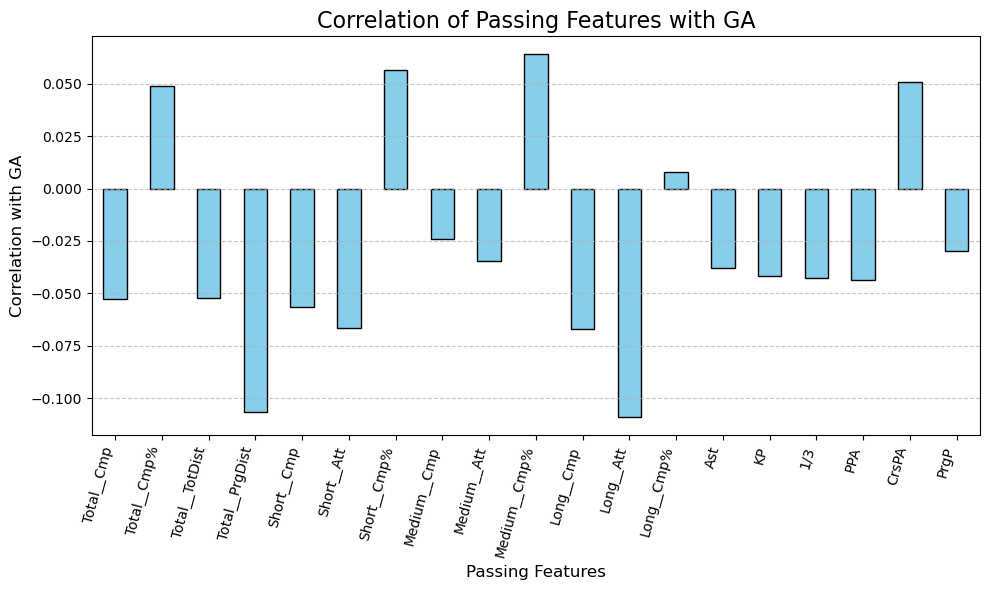

In [25]:
import matplotlib.pyplot as plt

# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_passing_GA_cleaned['GA']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Passing Features with GA', fontsize=16)
plt.xlabel('Passing Features', fontsize=12)
plt.ylabel('Correlation with GA', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
good_passing_features_GA = correlation_passing_GA_cleaned[(correlation_passing_GA_cleaned['GA'] >= 0.2) | (correlation_passing_GA_cleaned['GA'] <= -0.2)]
good_passing_features_GA = good_passing_features_GA['GA']
good_passing_features_GA

Series([], Name: GA, dtype: float64)

### Pass to win

In [27]:
correlation_passing_Win_cleaned = correlation_passing_Win[:-1]

In [28]:
correlation_passing_Win_cleaned['Win']

Total__Cmp        0.092509
Total__Att        0.080934
Total__Cmp%       0.064053
Total__TotDist    0.067091
Total__PrgDist    0.096431
Short__Cmp        0.124835
Short__Att        0.121844
Short__Cmp%       0.057782
Medium__Cmp       0.037436
Medium__Att       0.024928
Medium__Cmp%      0.035814
Long__Cmp         0.021373
Long__Att        -0.034184
Long__Cmp%        0.073136
Ast               0.529253
KP                0.180002
1/3               0.041433
PPA               0.125852
CrsPA            -0.086968
PrgP              0.036122
Name: Win, dtype: float64

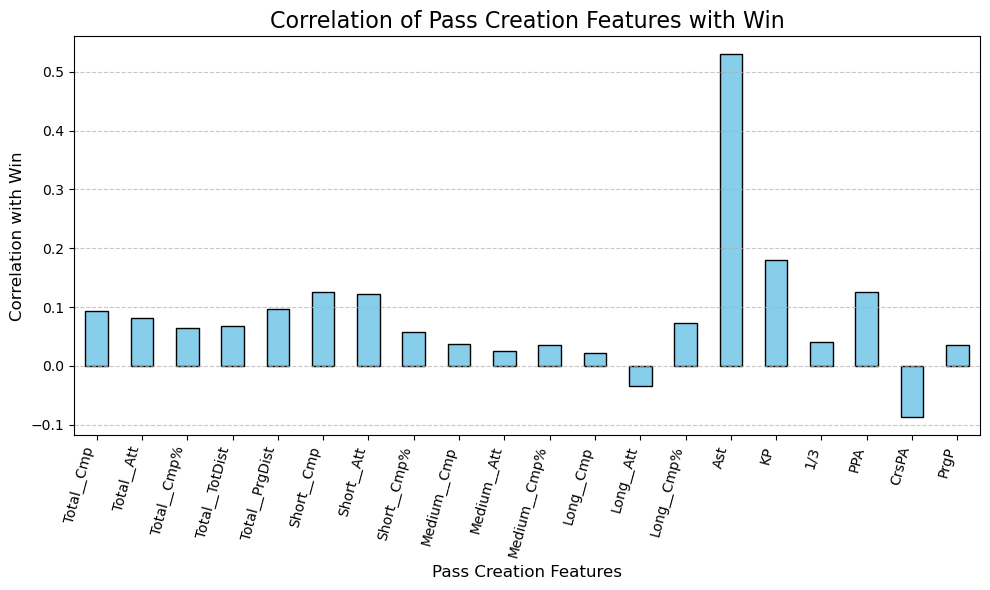

In [29]:
import matplotlib.pyplot as plt

# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_passing_Win_cleaned['Win']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Pass Creation Features with Win', fontsize=16)
plt.xlabel('Pass Creation Features', fontsize=12)
plt.ylabel('Correlation with Win', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [30]:
good_passing_features_win = correlation_passing_Win_cleaned[(correlation_passing_Win_cleaned['Win'] >= 0.2) | (correlation_passing_Win_cleaned['Win'] <= -0.2)]
good_passing_features_win = good_passing_features_win['Win']
good_passing_features_win

Ast    0.529253
Name: Win, dtype: float64

## c, Pass types

### Create df

In [31]:
pass_type_to_result = pd.concat([match_result, df_pass_type], axis=1)

### Correlation

In [40]:
temp_df = pass_type_to_result[pass_type_cols + ['GF', 'Win', 'GA']]

# Calculate the correlation between the selected columns and 'GF'
correlation_pass_type_GF = temp_df[pass_type_cols + ['GF']].corr()

# Calculate the correlation between the selected columns and 'Win'
correlation_pass_type_Win = temp_df[pass_type_cols + ['Win']].corr()

correlation_pass_type_GA = temp_df[pass_type_cols + ['GA']].corr()

### Pass type to GF

In [33]:
correlation_pass_type_GF_cleaned = correlation_pass_type_GF[:-1]
correlation_pass_type_GF_cleaned = correlation_pass_type_GF_cleaned.drop(index = correlation_pass_type_GF_cleaned.index[1])
correlation_pass_type_GF_cleaned['GF']

Att                  0.124271
Pass Types__Dead    -0.197169
Pass Types__FK      -0.111249
Pass Types__TB       0.246008
Pass Types__Sw       0.013551
Pass Types__Crs     -0.188251
Pass Types__TI      -0.166484
Pass Types__CK       0.007601
Corner Kicks__In    -0.048538
Corner Kicks__Out   -0.048880
Corner Kicks__Str   -0.005925
Outcomes__Cmp        0.156671
Outcomes__Off        0.049720
Outcomes__Blocks    -0.099042
Name: GF, dtype: float64

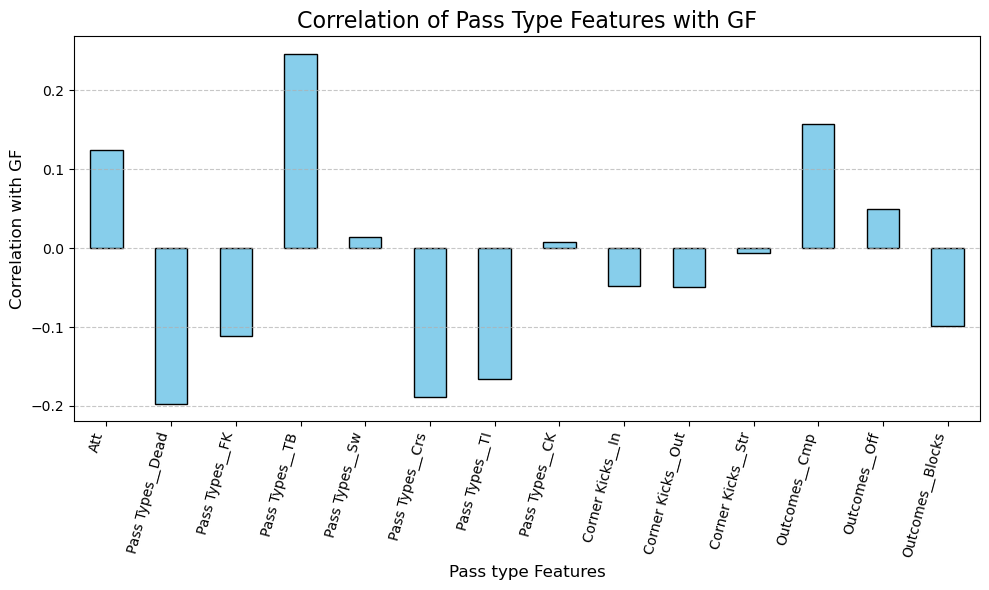

In [34]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_pass_type_GF_cleaned['GF']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Pass Type Features with GF', fontsize=16)
plt.xlabel('Pass type Features', fontsize=12)
plt.ylabel('Correlation with GF', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [35]:
good_pass_type_features = correlation_pass_type_GF_cleaned[(correlation_pass_type_GF_cleaned['GF'] >= 0.2) | (correlation_pass_type_GF_cleaned['GF'] <= -0.2)]
good_pass_type_features = good_pass_type_features['GF']
good_pass_type_features

Pass Types__TB    0.246008
Name: GF, dtype: float64

### Pass types to GA

In [41]:
correlation_pass_type_GA_cleaned = correlation_pass_type_GA[:-1]
correlation_pass_type_GA_cleaned = correlation_pass_type_GA_cleaned.drop(index = correlation_pass_type_GA_cleaned.index[1])


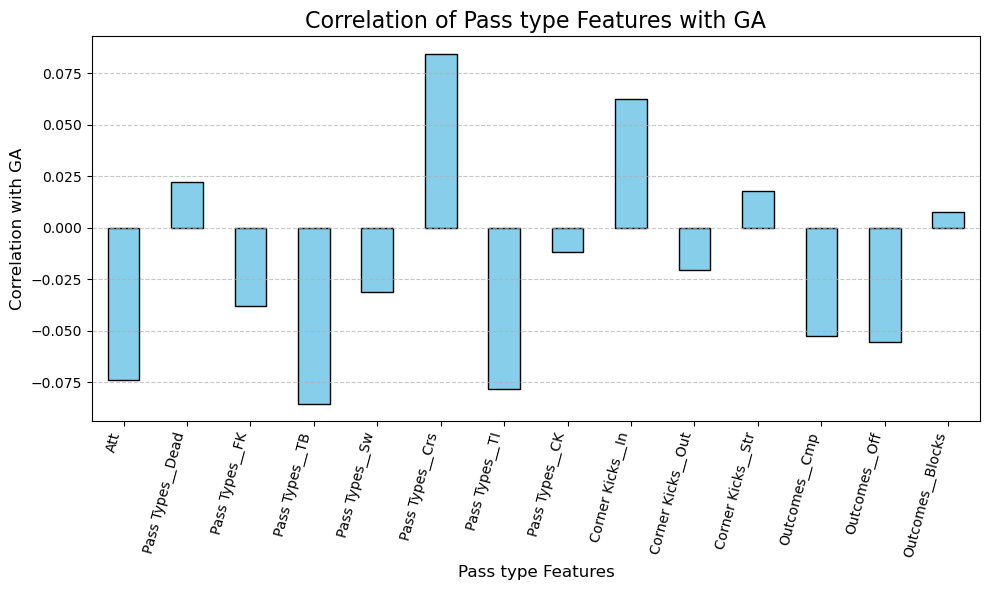

In [42]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_pass_type_GA_cleaned['GA']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Pass type Features with GA', fontsize=16)
plt.xlabel('Pass type Features', fontsize=12)
plt.ylabel('Correlation with GA', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [43]:
good_pass_type_features_GA = correlation_pass_type_GA_cleaned[(correlation_pass_type_GA_cleaned['GA'] >= 0.2) | (correlation_pass_type_GA_cleaned['GA'] <= -0.2)]
good_pass_type_features_GA = good_pass_type_features_GA['GA']
good_pass_type_features_GA

Series([], Name: GA, dtype: float64)

### Pass types to win

In [44]:
correlation_pass_type_Win_cleaned = correlation_pass_type_Win[:-1]
correlation_pass_type_Win_cleaned = correlation_pass_type_Win_cleaned.drop(index = correlation_pass_type_Win_cleaned.index[1])



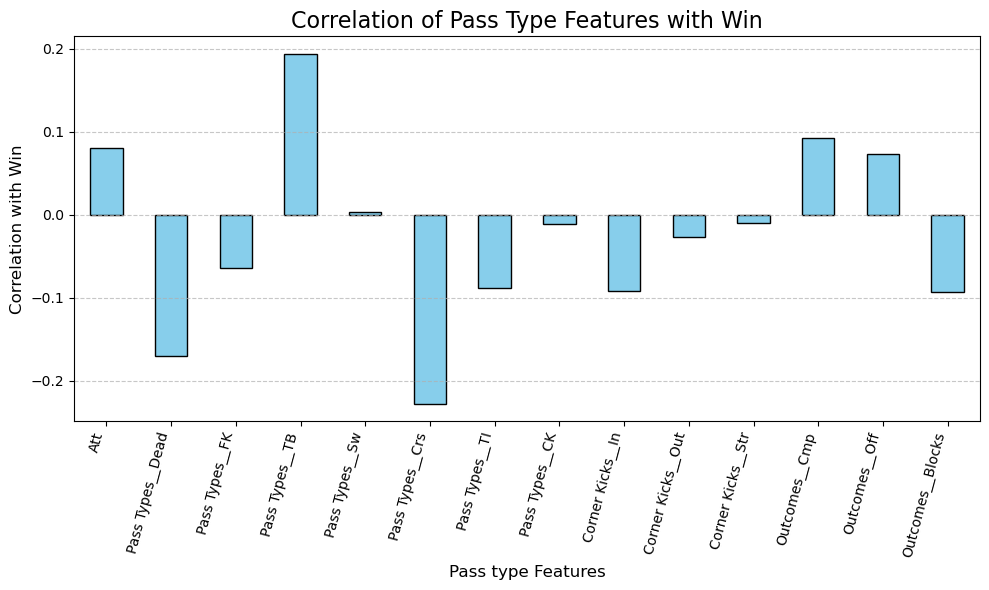

In [45]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_pass_type_Win_cleaned['Win']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Pass Type Features with Win', fontsize=16)
plt.xlabel('Pass type Features', fontsize=12)
plt.ylabel('Correlation with Win', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [46]:
good_pass_type_features_win = correlation_pass_type_Win_cleaned[(correlation_pass_type_Win_cleaned['Win'] >= 0.2) | (correlation_pass_type_Win_cleaned['Win'] <= -0.2)]
good_pass_type_features_win = good_pass_type_features_win['Win']
good_pass_type_features_win

Pass Types__Crs   -0.227791
Name: Win, dtype: float64

## d, Possess


### Change to df

In [47]:
possess_to_result = pd.concat([match_result, df_possess], axis=1)


### Correlation


In [48]:
temp_df = possess_to_result[possession_cols + ['GF', 'Win', 'GA']]

# Calculate the correlation between the selected columns and 'GF'
correlation_possess_GF = temp_df[possession_cols + ['GF']].corr()

# Calculate the correlation between the selected columns and 'Win'
correlation_possess_Win = temp_df[possession_cols + ['Win']].corr()

correlation_possess_GA = temp_df[possession_cols + ['GA']].corr()


### Possess to GF

In [49]:
correlation_possess_GF_cleaned = correlation_possess_GF[:-1]
correlation_possess_GF_cleaned = correlation_possess_GF_cleaned.drop(index = correlation_possess_GF_cleaned.index[1])


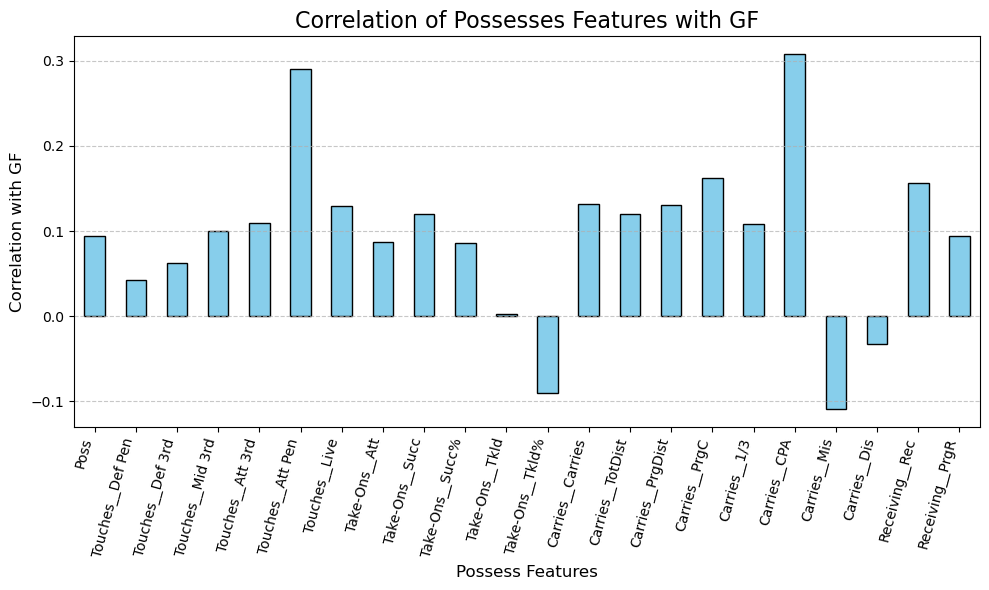

In [50]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_possess_GF_cleaned['GF']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Possesses Features with GF', fontsize=16)
plt.xlabel('Possess Features', fontsize=12)
plt.ylabel('Correlation with GF', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [51]:
good_possess_features_GF = correlation_possess_GF_cleaned[(correlation_possess_GF_cleaned['GF'] >= 0.2) | (correlation_possess_GF_cleaned['GF'] <= -0.2)]
good_possess_features_GF = good_possess_features_GF['GF']
good_possess_features_GF

Touches__Att Pen    0.290861
Carries__CPA        0.308057
Name: GF, dtype: float64

### Possesses to GA

In [52]:
correlation_possess_GA_cleaned = correlation_possess_GA[:-1]
correlation_possess_GA_cleaned = correlation_possess_GA_cleaned.drop(index = correlation_possess_GA_cleaned.index[1])


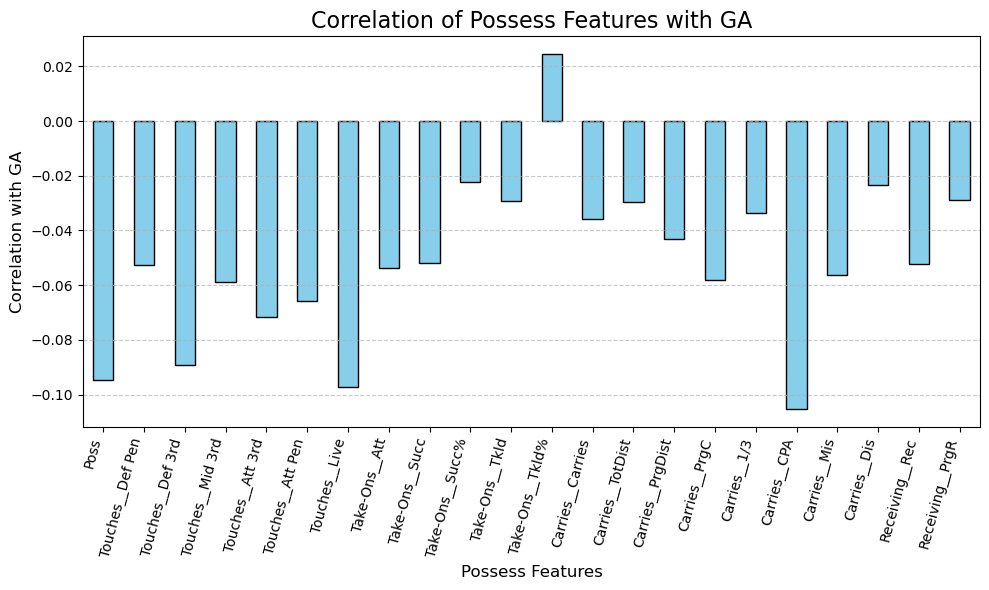

In [53]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_possess_GA_cleaned['GA']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Possess Features with GA', fontsize=16)
plt.xlabel('Possess Features', fontsize=12)
plt.ylabel('Correlation with GA', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [54]:
good_possess_features_GA = correlation_possess_GA_cleaned[(correlation_possess_GA_cleaned['GA'] >= 0.2) | (correlation_possess_GA_cleaned['GA'] <= -0.2)]
good_possess_features_GA = good_possess_features_GA['GA']
good_possess_features_GA

Series([], Name: GA, dtype: float64)

### Possesses to win

In [55]:
correlation_possess_win_cleaned = correlation_possess_Win[:-1]
correlation_possess_win_cleaned = correlation_possess_win_cleaned.drop(index = correlation_possess_win_cleaned.index[1])


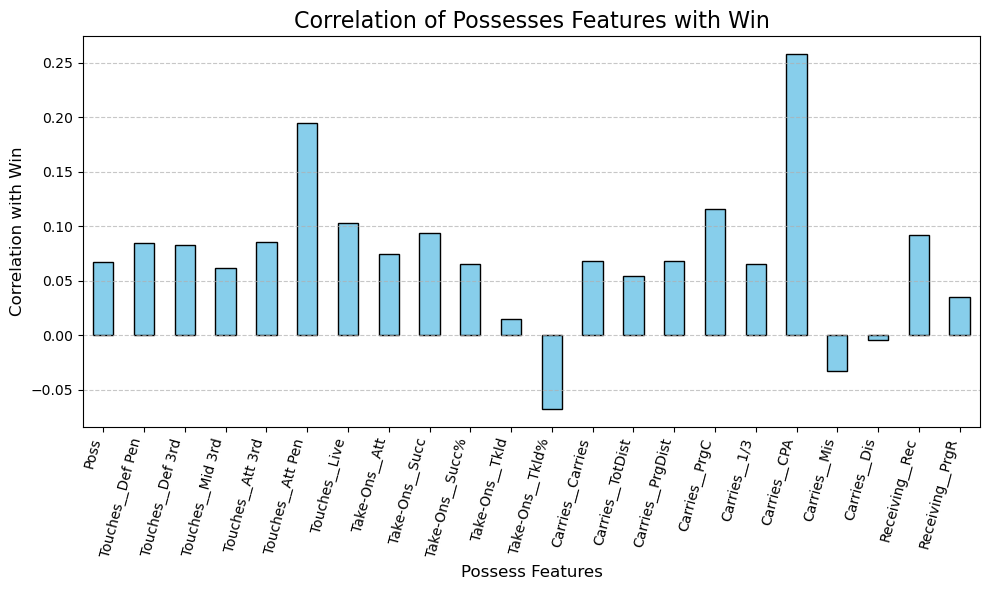

In [56]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_possess_win_cleaned['Win']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Possesses Features with Win', fontsize=16)
plt.xlabel('Possess Features', fontsize=12)
plt.ylabel('Correlation with Win', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [57]:
good_possess_features_win = correlation_possess_win_cleaned[(correlation_possess_win_cleaned['Win'] >= 0.2) | (correlation_possess_win_cleaned['Win'] <= -0.2)]
good_possess_features_win = good_possess_features_win['Win']
good_possess_features_win

Carries__CPA    0.258113
Name: Win, dtype: float64

## e, Miscell

### Create df

In [58]:
miscell_to_result = pd.concat([match_result, df_miscell], axis=1)

### Correlation

In [62]:
temp_df = miscell_to_result[miscellaneous_cols + ['GF', 'Win', 'GA']]

# Calculate the correlation between the selected columns and 'GF'
correlation_miscell_GF = temp_df[miscellaneous_cols + ['GF']].corr()
correlation_miscell_Win = temp_df[miscellaneous_cols + ['Win']].corr()
correlation_miscell_GA = temp_df[miscellaneous_cols + ['GA']].corr()


In [63]:
miscellaneous_cols

['Performance__CrdY',
 'Performance__CrdR',
 'Performance__2CrdY',
 'Performance__Fls',
 'Performance__Fld',
 'Performance__Off',
 'Performance__Crs',
 'Performance__Int',
 'Performance__TklW',
 'Performance__PKwon',
 'Performance__PKcon',
 'Performance__OG',
 'Performance__Recov',
 'Aerial Duels__Won',
 'Aerial Duels__Lost',
 'Aerial Duels__Won%']

### Miscell to GF

In [64]:
correlation_miscell_GF_cleaned = correlation_miscell_GF[:-1]
correlation_miscell_GF_cleaned = correlation_miscell_GF_cleaned.drop(index = correlation_miscell_GF_cleaned.index[1])


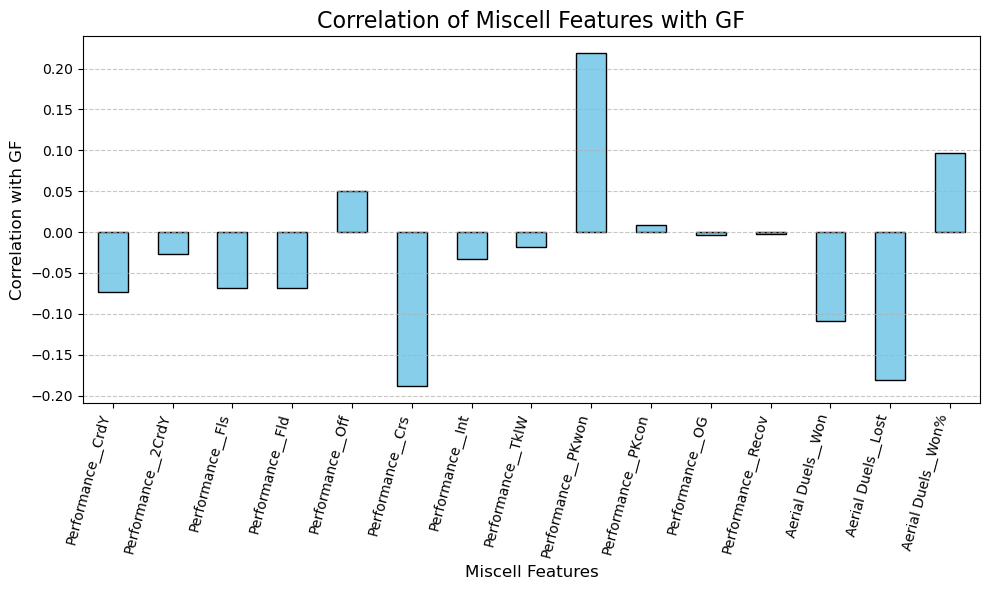

In [65]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_miscell_GF_cleaned['GF']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Miscell Features with GF', fontsize=16)
plt.xlabel('Miscell Features', fontsize=12)
plt.ylabel('Correlation with GF', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [66]:
good_miscell_features_GF = correlation_miscell_GF_cleaned[(correlation_miscell_GF_cleaned['GF'] >= 0.2) | (correlation_miscell_GF_cleaned['GF'] <= -0.2)]
good_miscell_features_GF = good_miscell_features_GF['GF']
good_miscell_features_GF

Performance__PKwon    0.219087
Name: GF, dtype: float64

### Miscell to GA

In [70]:
correlation_miscell_GA_cleaned = correlation_miscell_GA[:-1]
correlation_miscell_GA_cleaned = correlation_miscell_GA_cleaned.drop(index = correlation_miscell_GA_cleaned.index[1])


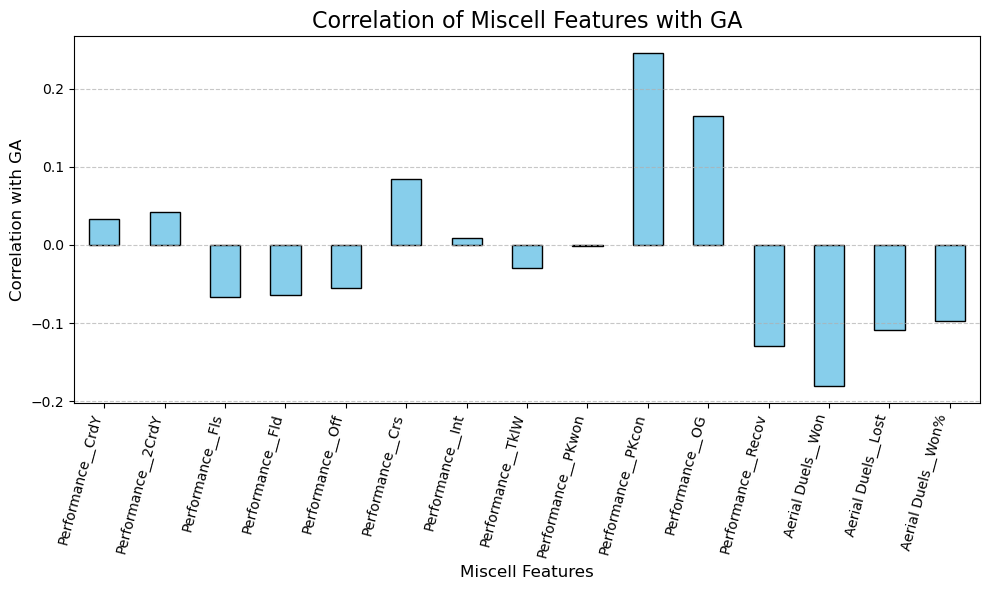

In [71]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_miscell_GA_cleaned['GA']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Miscell Features with GA', fontsize=16)
plt.xlabel('Miscell Features', fontsize=12)
plt.ylabel('Correlation with GA', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [72]:
good_miscell_features_GA = correlation_miscell_GA_cleaned[(correlation_miscell_GA_cleaned['GA'] >= 0.2) | (correlation_miscell_GA_cleaned['GA'] <= -0.2)]
good_miscell_features_GA = good_miscell_features_GA['GA']
good_miscell_features_GA

Performance__PKcon    0.245589
Name: GA, dtype: float64

### Miscell to win

In [73]:
correlation_miscell_win_cleaned = correlation_miscell_Win[:-1]
correlation_miscell_win_cleaned = correlation_miscell_win_cleaned.drop(index = correlation_miscell_win_cleaned.index[1])


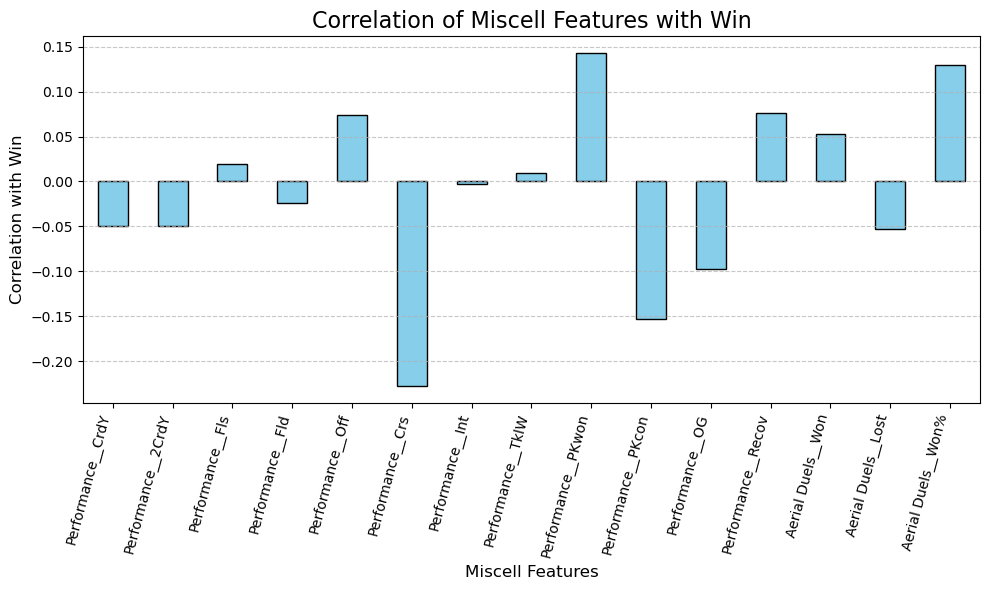

In [74]:
# Extract the cleaned correlation values for 'GF'
correlation_values = correlation_miscell_win_cleaned['Win']

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart details
plt.title('Correlation of Miscell Features with Win', fontsize=16)
plt.xlabel('Miscell Features', fontsize=12)
plt.ylabel('Correlation with Win', fontsize=12)
plt.xticks(rotation=75, ha='right', fontsize=10)  # Rotate feature labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [75]:
good_miscell_features_win = correlation_miscell_win_cleaned[(correlation_miscell_win_cleaned['Win'] >= 0.2) | (correlation_miscell_win_cleaned['Win'] <= -0.2)]
good_miscell_features_win = good_miscell_features_win['Win']
good_miscell_features_win

Performance__Crs   -0.227791
Name: Win, dtype: float64

In [76]:
good_list = ['Ast', 'KP', 'PPA', 'Pass Types__TB', 'Pass Types__Crs',
             'Touches__Att Pen', 'Carries__CPA', 'Performance__PKwon', 'Performance__Crs']